# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)
import seaborn as sns

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# What the dataset looks like?

websites.head()

URL  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     CHARSET  \
0   M0_109          16                          7  iso-8859-1   
1  B0_2314          16                          6       UTF-8   
2   B0_911          16                          6    us-ascii   
3   B0_113          17                          6  ISO-8859-1   
4   B0_403          17                          6       UTF-8   

                  SERVER  CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
0                  nginx           263.0          None           None   
1          Apache/2.4.10         15087.0          None           None   
2  Microsoft-HTTPAPI/2.0           324.0          None           None   
3                  nginx           162.0            US             AK   
4                   None        124140.0            US             TX   

      WHOIS_REGDATE WHOIS_UPDATED_DATE  TCP_CONVERSATION_EXCHANGE  \
0  10/10/2015 18:21               None                          7   
1              None               None                         17   
2              None               None                          0   
3    7/10/1997 4:00    12/09/2013 0:45                         31   
4   12/05/1996 0:00    11/04/2017 0:00                         57   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
0                     0           2        700                   9   
1                     7           4       1230                  17   
2                     0           0          0                   0   
3                    22           3       3812                  39   
4                     2           5       4278                  61   

   REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  APP_PACKETS  \
0                  10              1153               832            9   
1                  19              1265              1230           17   
2                   0                 0                 0            0   
3                  37             18784              4380           39   
4                  62            129889              4586           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

In [4]:
# checking the shape of the dataframe

websites.shape

(1781, 21)

In [5]:
# checking for the data types

websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
# Which columns contain the features of the websites?

website_features = ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER','CONTENT_LENGTH', 
                    'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE','WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
                    'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS','REMOTE_APP_PACKETS',
                    'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES','APP_PACKETS', 'DNS_QUERY_TIMES']

In [7]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

print("The column that contains the feature we will predict is column 'Type'")

The column that contains the feature we will predict is column 'Type'


In [8]:
number_malicious_websites = len(websites[(websites['Type']==1)])                              
number_benign_websites = len(websites[(websites['Type']==0)])

print("Number of malicious websites:", number_malicious_websites)
print("Number of benign websites:", number_benign_websites)

Number of malicious websites: 216
Number of benign websites: 1565


In [9]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

"""
We need to transform the following columns:

URL
CHARSET
SERVER
WHOIS_COUNTRY
WHOIS_STATEPRO
WHOIS_REGDATE
WHOIS_UPDATED_DATE

"""

'\nWe need to transform the following columns:\n\nURL\nCHARSET\nSERVER\nWHOIS_COUNTRY\nWHOIS_STATEPRO\nWHOIS_REGDATE\nWHOIS_UPDATED_DATE\n\n'

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

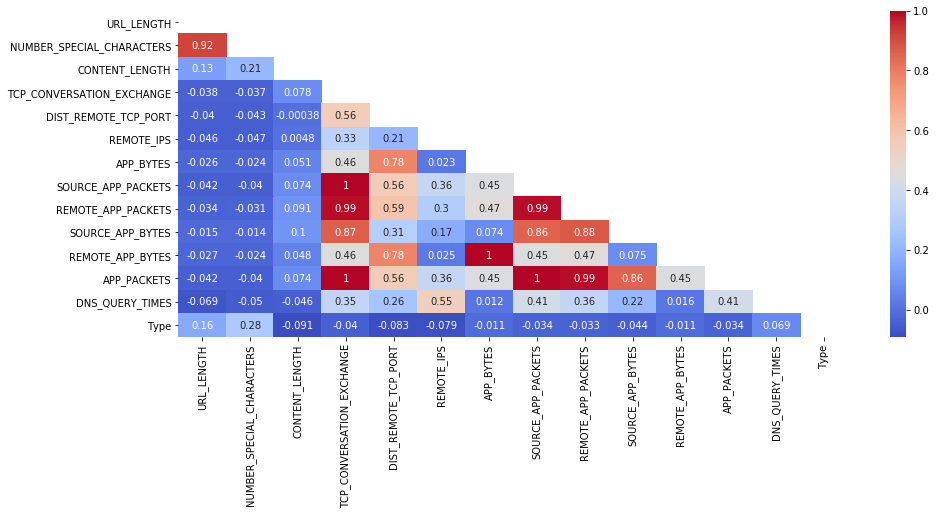

In [10]:
# creating an heatmap

corr_matrix = websites.corr()
plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

In [11]:
"""
High collinearity columns:

NUMBER_SPECIAL_CHARACTERS with URL_LENGHT 

SOURCE_APP_PACKETS with TCP_CONVERSION_EXCHANGE 

REMOTE_APP_PACKETS with TCP_CONVERSION_EXCHANGE 
REMOTE_APP_PACKETS with SOURCE_APP_PACKETS
REMOTE_APP_BYTES with APP_BYTES

APP_PACKETS with TCP_CONVERSION_EXCHANGE
APP_PACKETS with SOURCE_APP_PACKETS 
APP_PACKETS with REMOTE_APP_PACKETS

"""

'\nHigh collinearity columns:\n\nNUMBER_SPECIAL_CHARACTERS with URL_LENGHT \n\nSOURCE_APP_PACKETS with TCP_CONVERSION_EXCHANGE \n\nREMOTE_APP_PACKETS with TCP_CONVERSION_EXCHANGE \nREMOTE_APP_PACKETS with SOURCE_APP_PACKETS\nREMOTE_APP_BYTES with APP_BYTES\n\nAPP_PACKETS with TCP_CONVERSION_EXCHANGE\nAPP_PACKETS with SOURCE_APP_PACKETS \nAPP_PACKETS with REMOTE_APP_PACKETS\n\n'

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [12]:
# I'm going to remove first three columns

cols_to_remove = ['NUMBER_SPECIAL_CHARACTERS','SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 
                  'TCP_CONVERSATION_EXCHANGE','REMOTE_APP_BYTES']

websites.drop(cols_to_remove, axis=1, inplace=True)

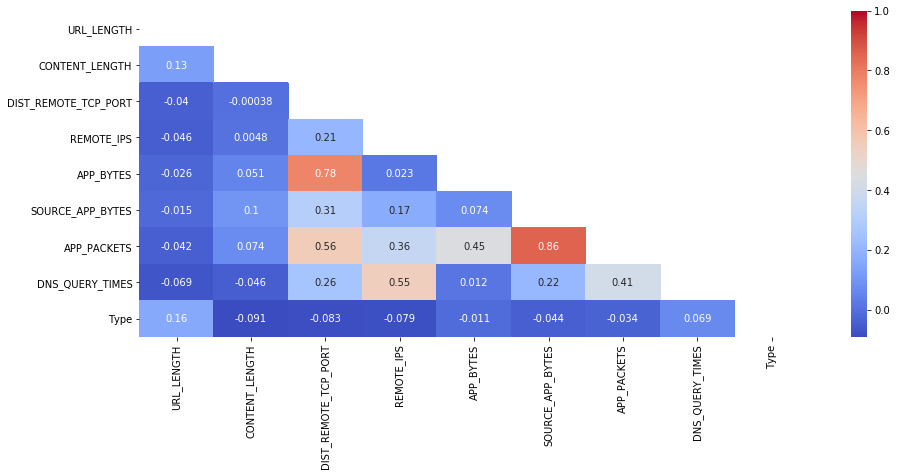

In [13]:
# creating an heatmap

corr_matrix = websites.corr()
plt.figure(figsize=(15,6))
mask = np.triu(corr_matrix)

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", mask=mask)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

heatmap

In [14]:
"""
Now we don't have any more columns strongly correlated

"""


"\nNow we don't have any more columns strongly correlated\n\n"

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [15]:
# checking for missing values

null_cols = websites.isnull().sum()
null_cols

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [16]:
# calculating the proportion of missing values

len_proportion = websites['CONTENT_LENGTH'].isnull().sum()
len_total = len(websites)
ratio = len_proportion / len_total

print("Percentage of missing values in the CONTENT_LENGHT column:", round(ratio*100,2), "%")

Percentage of missing values in the CONTENT_LENGHT column: 45.59 %


In [17]:
# dropping the column CONTENT_LENGHT because there is a high proportion of missing values

websites.drop(columns=['CONTENT_LENGTH'], inplace=True, axis=1)

In [18]:
# removing the rows with missing values

websites.dropna(axis = 0, inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [19]:
# confirming that we don't have missing values anymore

null_cols = websites.isnull().sum()
null_cols

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [20]:
# unique values of WHOIS_COUNTRY

websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [21]:
websites.loc[websites['WHOIS_COUNTRY'] == 'Cyprus', 'WHOIS_COUNTRY'] = 'CY'
websites.loc[websites['WHOIS_COUNTRY'] == 'us', 'WHOIS_COUNTRY'] = 'US'
websites.loc[websites['WHOIS_COUNTRY'] == 'se', 'WHOIS_COUNTRY'] = 'SE'
websites.loc[websites['WHOIS_COUNTRY'] == 'United Kingdom', 'WHOIS_COUNTRY'] = 'GB'
websites.loc[websites['WHOIS_COUNTRY'] == "[u'GB'; u'UK']", 'WHOIS_COUNTRY'] = 'GB'

In [22]:
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY',
       'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR',
       'HK', 'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY',
       'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

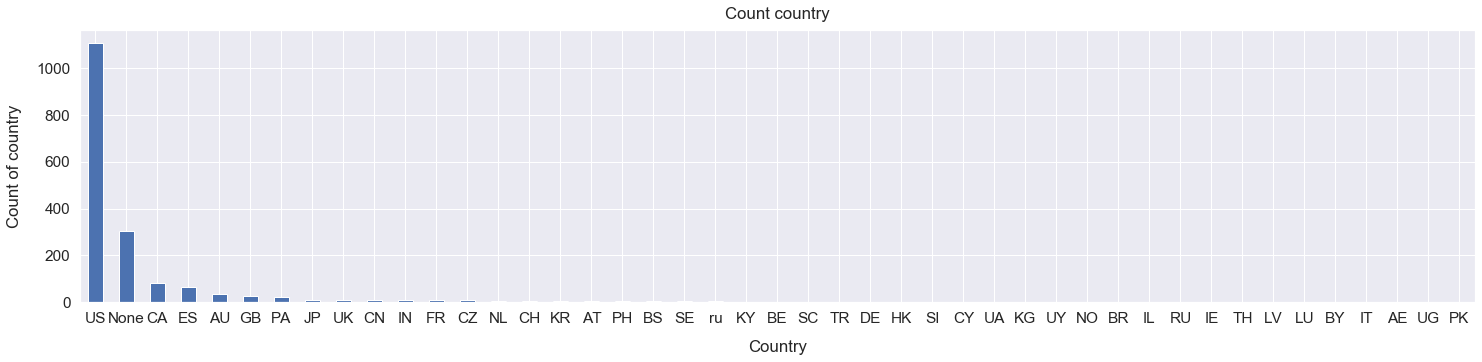

In [23]:
count_countries = websites['WHOIS_COUNTRY'].value_counts()

sns.set(font_scale=1.4)
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar', figsize=(25, 5), rot=0)
plt.xlabel("Country", labelpad=14)
plt.ylabel("Count of country", labelpad=14)
plt.title("Count country", y=1.02);

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [24]:
list_country_to_keep = websites['WHOIS_COUNTRY'].value_counts()[:10].index.to_list()
list_country_to_remove = websites['WHOIS_COUNTRY'].value_counts()[10:].index.to_list()

websites['WHOIS_COUNTRY'] = np.where(websites['WHOIS_COUNTRY'].isin(list_country_to_remove),'OTHER',websites['WHOIS_COUNTRY'])

In [25]:
count_countries = websites['WHOIS_COUNTRY'].value_counts()

sns.set(font_scale=1.4)
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar', figsize=(25, 5), rot=0)
plt.xlabel("Country", labelpad=14)
plt.ylabel("Count of country", labelpad=14)
plt.title("Count country", y=1.02);

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [26]:
cols_to_remove = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

websites.drop(cols_to_remove, axis=1, inplace=True)

In [27]:
websites.head()

URL  URL_LENGTH     CHARSET                 SERVER WHOIS_COUNTRY  \
0   M0_109          16  iso-8859-1                  nginx          None   
1  B0_2314          16       UTF-8          Apache/2.4.10          None   
2   B0_911          16    us-ascii  Microsoft-HTTPAPI/2.0          None   
3   B0_113          17  ISO-8859-1                  nginx            US   
4   B0_403          17       UTF-8                   None            US   

   DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  \
0                     0           2        700              1153            9   
1                     7           4       1230              1265           17   
2                     0           0          0                 0            0   
3                    22           3       3812             18784           39   
4                     2           5       4278            129889           61   

   DNS_QUERY_TIMES  Type  
0              2.0     1  
1              0.0     0  
2              0.0     0  
3              8.0     0  
4              4.0     0

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [28]:
websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [29]:
websites.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [30]:
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [31]:
unique_websites = websites['SERVER'].unique()
unique_websites

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [32]:
def server(server_link):
    
    brands_list = ['Microsoft', 'Apache','nginx']
    output = 'Other'
    
    for brand in brands_list:
        if brand in str(server_link):
            output = brand
            
    return output

In [33]:
websites['SERVER'] = websites['SERVER'].apply(lambda x: server(x))


In [34]:
websites

URL_LENGTH     CHARSET     SERVER WHOIS_COUNTRY  DIST_REMOTE_TCP_PORT  \
0             16  iso-8859-1      nginx          None                     0   
1             16       UTF-8     Apache          None                     7   
2             16    us-ascii  Microsoft          None                     0   
3             17  ISO-8859-1      nginx            US                    22   
4             17       UTF-8      Other            US                     2   
...          ...         ...        ...           ...                   ...   
1776         194       UTF-8     Apache            ES                     0   
1777         198       UTF-8     Apache            ES                     0   
1778         201       utf-8     Apache            US                     2   
1779         234  ISO-8859-1      nginx            US                     0   
1780         249       utf-8  Microsoft            US                     6   

      REMOTE_IPS  APP_BYTES  SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  \
0              2        700              1153            9              2.0   
1              4       1230              1265           17              0.0   
2              0          0                 0            0              0.0   
3              3       3812             18784           39              8.0   
4              5       4278            129889           61              4.0   
...          ...        ...               ...          ...              ...   
1776           0          0               186            0              0.0   
1777           0          0               124            0              0.0   
1778           6       6631            132181           87              4.0   
1779           0          0                 0            0              0.0   
1780          11       2314              3039           25              6.0   

      Type  
0        1  
1        0  
2        0  
3        0  
4        0  
...    ...  
1776     1  
1777     1  
1778     0  
1779     0  
1780     0  

[1779 rows x 11 columns]

In [35]:
print(websites['SERVER'].value_counts())

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [36]:
website_dummy = pd.get_dummies(data=websites, drop_first=True, columns=['SERVER', 'CHARSET', 'WHOIS_COUNTRY'])

In [37]:
website_dummy

URL_LENGTH  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0             16                     0           2        700   
1             16                     7           4       1230   
2             16                     0           0          0   
3             17                    22           3       3812   
4             17                     2           5       4278   
...          ...                   ...         ...        ...   
1776         194                     0           0          0   
1777         198                     0           0          0   
1778         201                     2           6       6631   
1779         234                     0           0          0   
1780         249                     6          11       2314   

      SOURCE_APP_BYTES  APP_PACKETS  DNS_QUERY_TIMES  Type  SERVER_Microsoft  \
0                 1153            9              2.0     1                 0   
1                 1265           17              0.0     0                 0   
2                    0            0              0.0     0                 1   
3                18784           39              8.0     0                 0   
4               129889           61              4.0     0                 0   
...                ...          ...              ...   ...               ...   
1776               186            0              0.0     1                 0   
1777               124            0              0.0     1                 0   
1778            132181           87              4.0     0                 0   
1779                 0            0              0.0     0                 0   
1780              3039           25              6.0     0                 1   

      SERVER_Other  SERVER_nginx  CHARSET_ISO-8859-1  CHARSET_None  \
0                0             1                   0             0   
1                0             0                   0             0   
2                0             0                   0             0   
3                0             1                   1             0   
4                1             0                   0             0   
...            ...           ...                 ...           ...   
1776             0             0                   0             0   
1777             0             0                   0             0   
1778             0             0                   0             0   
1779             0             1                   1             0   
1780             0             0                   0             0   

      CHARSET_UTF-8  CHARSET_iso-8859-1  CHARSET_us-ascii  CHARSET_utf-8  \
0                 0                   1                 0              0   
1                 1                   0                 0              0   
2                 0                   0                 1              0   
3                 0                   0                 0              0   
4                 1                   0                 0              0   
...             ...                 ...               ...            ...   
1776              1                   0                 0              0   
1777              1                   0                 0              0   
1778              0                   0                 0              1   
1779              0                   0                 0              0   
1780              0                   0                 0              1   

      CHARSET_windows-1251  CHARSET_windows-1252  WHOIS_COUNTRY_CA  \
0                        0                     0                 0   
1                        0                     0                 0   
2                        0                     0                 0   
3                        0                     0                 0   
4                        0                     0                 0   
...                    ...                   ...               ...   
1776                

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [38]:
website_dummy.dtypes

URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
SERVER_Microsoft          uint8
SERVER_Other              uint8
SERVER_nginx              uint8
CHARSET_ISO-8859-1        uint8
CHARSET_None              uint8
CHARSET_UTF-8             uint8
CHARSET_iso-8859-1        uint8
CHARSET_us-ascii          uint8
CHARSET_utf-8             uint8
CHARSET_windows-1251      uint8
CHARSET_windows-1252      uint8
WHOIS_COUNTRY_CA          uint8
WHOIS_COUNTRY_CN          uint8
WHOIS_COUNTRY_ES          uint8
WHOIS_COUNTRY_GB          uint8
WHOIS_COUNTRY_JP          uint8
WHOIS_COUNTRY_None        uint8
WHOIS_COUNTRY_OTHER       uint8
WHOIS_COUNTRY_PA          uint8
WHOIS_COUNTRY_UK          uint8
WHOIS_COUNTRY_US          uint8
dtype: object

In [39]:
website_dummy.isnull().sum()

URL_LENGTH              0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
SERVER_Microsoft        0
SERVER_Other            0
SERVER_nginx            0
CHARSET_ISO-8859-1      0
CHARSET_None            0
CHARSET_UTF-8           0
CHARSET_iso-8859-1      0
CHARSET_us-ascii        0
CHARSET_utf-8           0
CHARSET_windows-1251    0
CHARSET_windows-1252    0
WHOIS_COUNTRY_CA        0
WHOIS_COUNTRY_CN        0
WHOIS_COUNTRY_ES        0
WHOIS_COUNTRY_GB        0
WHOIS_COUNTRY_JP        0
WHOIS_COUNTRY_None      0
WHOIS_COUNTRY_OTHER     0
WHOIS_COUNTRY_PA        0
WHOIS_COUNTRY_UK        0
WHOIS_COUNTRY_US        0
dtype: int64

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [40]:
from sklearn.model_selection import train_test_split

y = website_dummy['Type']
X = website_dummy[website_dummy.columns.difference(['Type'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [41]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [42]:
model_logistic.fit(X_train, y_train)


C:\Users\mafal.MIGUELFRAGOSO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [44]:
# confusion_matrix

y_pred_test = model_logistic.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[314,   5],
       [ 31,   6]], dtype=int64)

In [45]:
# accuracy_score

accuracy_score(y_test, y_pred_test)

0.898876404494382

What are your thoughts on the performance of the model? Write your conclusions below.

In [50]:
print("Model with an accuracy score quite high of aproximately 89%")

Model with an accuracy score quite high of aproximately 89%


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [47]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [48]:
# confusion_matrix

y_neigh_pred_test = neigh.predict(X_test)
confusion_matrix(y_test, y_neigh_pred_test)

array([[307,  12],
       [  9,  28]], dtype=int64)

In [49]:
accuracy_score(y_test, y_neigh_pred_test)

0.9410112359550562

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [51]:
neigh_k5 = KNeighborsClassifier(n_neighbors=5)
neigh_k5.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [52]:
# confusion_matrix

y_neigh5_pred_test = neigh.predict(X_test)
confusion_matrix(y_test, y_neigh5_pred_test)

array([[307,  12],
       [  9,  28]], dtype=int64)

In [53]:
accuracy_score(y_test, y_neigh5_pred_test)

0.9410112359550562

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [53]:
"""
I don't understand why I'm having the exact same confusion matrix and accurancy score???
"""


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [54]:
# Your code here